In [1]:
#pip install plotly

In [2]:
from jlma import JLMA
from utils import make_swiss_s
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
x_swiss, x_s, categories_swiss, categories_s = make_swiss_s(n_samples = 1000)

In [5]:
# x_s = scaler.fit_transform(x_s)
# x_swiss = scaler.fit_transform(x_swiss)

In [6]:
x_s, x_s.shape

(array([[-0.90484409,  1.72576361, -1.42574309],
        [ 0.96888703,  0.54834062, -0.7524966 ],
        [-0.97044581,  1.14365217,  0.75868086],
        ...,
        [-0.14142412,  1.12134395,  1.9899491 ],
        [-0.78400913,  1.87148691, -1.62074929],
        [ 0.51330934,  1.0334815 , -1.85820366]]),
 (1000, 3))

In [7]:
anchor_inds = np.random.choice(range(len(x_swiss)), 100, replace=False)
anchors = [(i, i) for i in anchor_inds]

In [8]:
#ADDED by ADAM
np.array(anchors).shape, anchors[:5]

((100, 2), [(688, 688), (448, 448), (734, 734), (755, 755), (964, 964)])

In [9]:
jlma = JLMA(d = 3, k = 30)
jlma.fit(x_swiss, x_s, anchors)

In [10]:
cats = np.concatenate((categories_swiss, categories_s))


In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=jlma.Y[:, 0],
    y=jlma.Y[:, 1],
    z=jlma.Y[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cats,
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.show()

In [12]:
jlma.Y1.shape #ADDED by ADAM

(1000, 3)

<Axes: >

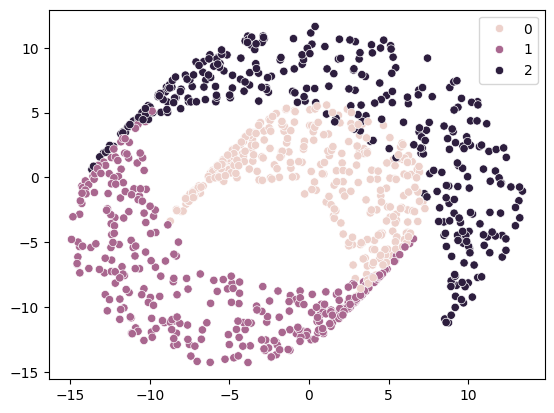

In [13]:
sns.scatterplot(x = jlma.Y1[:, 1], y = jlma.Y1[:, 2], hue = categories_swiss)

<Axes: >

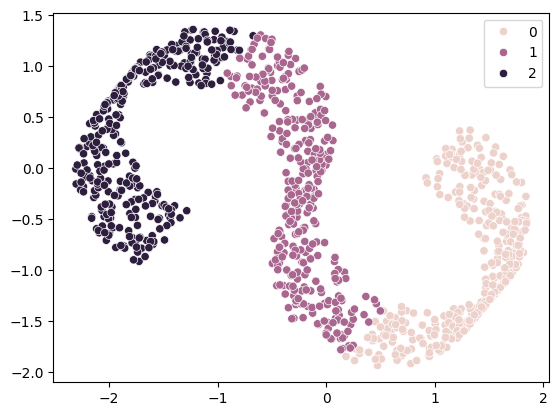

In [14]:
sns.scatterplot(x = jlma.Y2[:, 1], y = jlma.Y2[:, 2], hue = categories_s)

<Axes: >

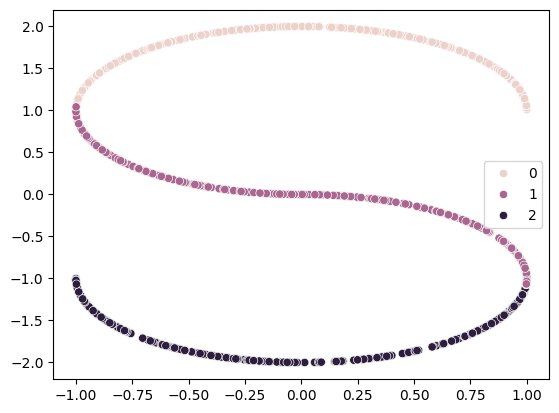

In [15]:
sns.scatterplot(x = jlma.X2[:, 0], y = jlma.X2[:, 2], hue = categories_s)

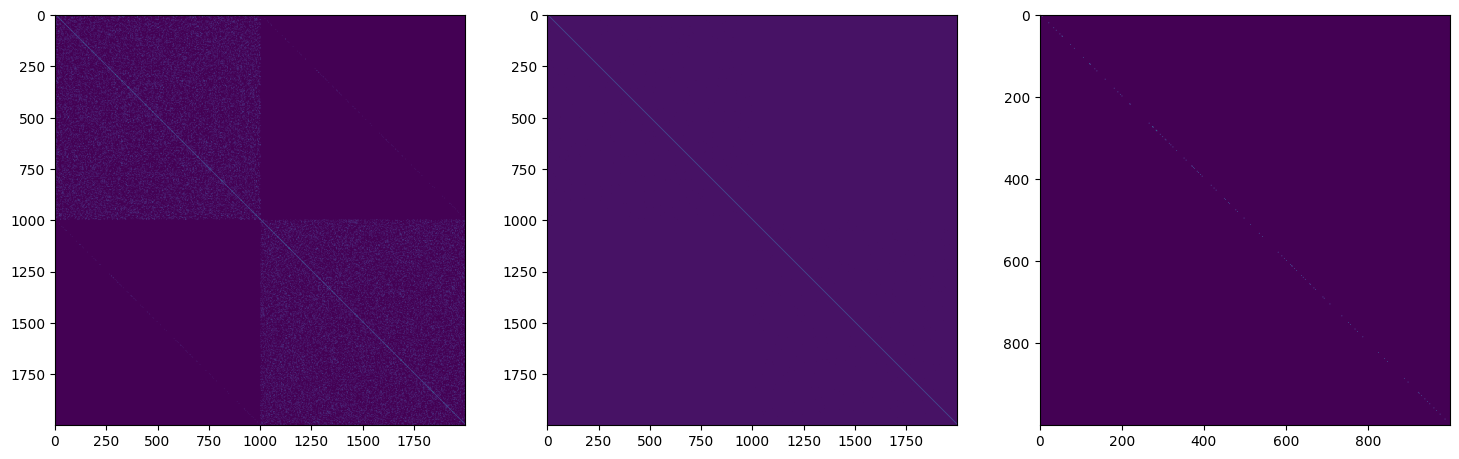

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (18, 8)) #Changed from 8, 5

ax[0].imshow(jlma.W)
ax[1].imshow(jlma.L)
ax[2].imshow(jlma.W[1000:, :1000]) #Added by ADAM

In [17]:
import phate

phate_op = phate.PHATE(knn_dist = 'precomputed_affinity')

Y_phate = phate_op.fit_transform(jlma.W)


Calculating PHATE...
  Running PHATE on precomputed affinity matrix with 2000 observations.
  Calculating graph and diffusion operator...
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 1.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.49 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.69 seconds.
Calculated PHATE in 6.91 seconds.


<Axes: >

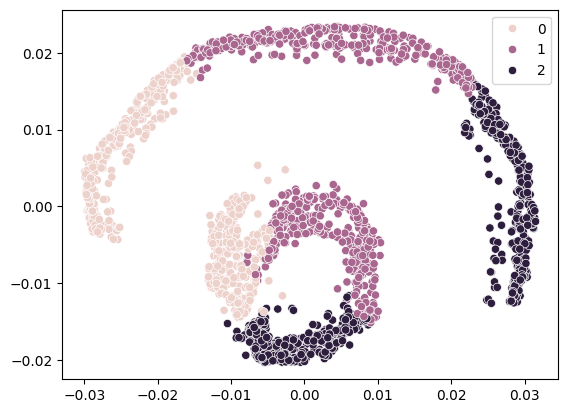

In [18]:
sns.scatterplot(x = Y_phate[:, 0], y = Y_phate[:, 1], hue = cats)

# Adam's Additions below for testing

In [19]:
import test_manifold_algorithms as tma

2024-06-03 09:12:20.404154: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 09:12:20.408224: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 09:12:20.455770: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 09:12:22.308440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [20]:
test = tma.test_manifold_algorithms("S-curve", verbose =2)


 
 
---------------------------       Initalizing class with S-curve data       ---------------------------

Creating swiss rolls and S curve data
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


In [21]:
test.run_JLMA_tests() #It is very fast :)


--------------------------------------   JLMA TESTS /S-curve   --------------------------------------

KNN 2
    Percent of Anchors 0.05
        Cross Embedding: 0.335
    Percent of Anchors 0.1
        Cross Embedding: 0.165
    Percent of Anchors 0.15
        Cross Embedding: 0.145
    Percent of Anchors 0.2
        Cross Embedding: 0.24
    Percent of Anchors 0.3
        Cross Embedding: 0.25
KNN 7
    Percent of Anchors 0.05
        Cross Embedding: 0.22
    Percent of Anchors 0.1
        Cross Embedding: 0.335
    Percent of Anchors 0.15
        Cross Embedding: 0.335
    Percent of Anchors 0.2
        Cross Embedding: 0.25
    Percent of Anchors 0.3
        Cross Embedding: 0.225
KNN 12
    Percent of Anchors 0.05
        Cross Embedding: 0.15
    Percent of Anchors 0.1
        Cross Embedding: 0.155
    Percent of Anchors 0.15
        Cross Embedding: 0.17
    Percent of Anchors 0.2
        Cross Embedding: 0.16
    Percent of Anchors 0.3
        Cross Embedding: 0.14
KNN 17
  

True

In [22]:
#For comparision
test.run_SSMA_tests()

<><><><><>    File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/S-curve/SSMA(N42)_AP(0.05-0.1-0.15-0.2-0.3)_47.npy already exists   <><><><><>


True

JLMA is unable to take differing split sizes

In [23]:
test = tma.test_manifold_algorithms("iris.csv", verbose =2)
test.run_JLMA_tests()
#For comparision
test.run_SSMA_tests() 


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 3)
Split B Features shape (150, 1)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

--------------------------------------   JLMA TESTS /iris   --------------------------------------

KNN 2
    Percent of Anchors 0.05
<><><><><><>   UNABLE TO CREATE CLASS BECUASE all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 1   <><><><><><>
    Percent of Anchors 0.1
<><><><><><>   UNABLE TO CREATE CLASS BECUASE all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 1   <><><><><><>
    Percent of Anchors 0.15
<><><><><><>   UNABLE TO CREATE CLASS B

True

In [24]:
test = tma.test_manifold_algorithms("iris.csv", split = "even", verbose =2)
test.run_JLMA_tests() #It does great here!
#For comparision
#test.run_SSMA_tests() 


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

--------------------------------------   JLMA TESTS /iris   --------------------------------------

KNN 2
    Percent of Anchors 0.05
        Cross Embedding: 0.94
    Percent of Anchors 0.1
        Cross Embedding: 0.96
    Percent of Anchors 0.15
        Cross Embedding: 0.94
    Percent of Anchors 0.2
        Cross Embedding: 0.94
    Percent of Anchors 0.3
        Cross Embedding: 0.96
KNN 6
    Percent of Anchors 0.05
        Cross Embedding: 0.9266666666666666
    Percent of Anchors 0.1
        Cross Embedding: 0.9266666666666666
    Percent of Anchors 0.15
        Cross Embedding: 0.9266666666666666
    Percent of Anchors 0.2
        Cross Embedding: 0.9266666666666666
    Percent of Ancho

True

In [25]:
test = tma.test_manifold_algorithms("seeds.csv", split = "even", verbose =2)
test.run_JLMA_tests() #It does great here!


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (199, 4)
Split B Features shape (199, 3)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

--------------------------------------   JLMA TESTS /seeds   --------------------------------------

KNN 2
    Percent of Anchors 0.05
<><><><><><>   UNABLE TO CREATE CLASS BECUASE all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3   <><><><><><>
    Percent of Anchors 0.1
<><><><><><>   UNABLE TO CREATE CLASS BECUASE all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3   <><><><><><>
    Percent of Anchors 0.15
<><><><><><>   UNABLE TO CREATE CLASS BE

True

In [26]:
test = tma.test_manifold_algorithms("blobs", split = "even", verbose =2)
test.run_JLMA_tests() #It does great here!


 
 
---------------------------       Initalizing class with blobs data       ---------------------------

The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)

--------------------------------------   JLMA TESTS /blobs   --------------------------------------

KNN 2
    Percent of Anchors 0.05
        Cross Embedding: 0.5533333333333333
    Percent of Anchors 0.1
        Cross Embedding: 0.57
    Percent of Anchors 0.15
        Cross Embedding: 0.5666666666666667
    Percent of Anchors 0.2
        Cross Embedding: 0.5533333333333333
    Percent of Anchors 0.3
        Cross Embedding: 0.5533333333333333
KNN 9
    Percent of Anchors 0.05
        Cross Embedding: 0.5566666666666666
    Percent of Anchors 0.1
        Cross Embedding: 0.5633333333333334
    Percent of Anchors 0.15
        Cross Embedding: 0.5666666666666667
    Percent of Anchors 0.2
        Cross Embedding: 0.56
    Percent of Anchors 0.3
        Cross Embedding: 0.5566666666666666
KNN 16
    Percent of Anchors 0.0

True

# Attempting FOSCTTM Scores

In [27]:
#I added this!
from scipy.spatial.distance import pdist, squareform
def SquareDist(domain_A):
    #Just using a normal distance matrix without Igraph
    x_dists = squareform(pdist(domain_A))

    #normalize it
    x_dists = x_dists / np.max(x_dists, axis = None)

    return x_dists

In [28]:
domain_ab = SquareDist(jlma.Y1)
domain_ba = SquareDist(jlma.Y2)
block = SquareDist(jlma.Y)

In [29]:
pdist(jlma.Y1).shape, jlma.Y1.shape, jlma.Y2.shape, jlma.Y.shape

((499500,), (1000, 3), (1000, 3), (2000, 3))

In [37]:
pdist(jlma.Y).shape

(1999000,)

In [41]:
test.FOSCTTM(domain_ab), test.FOSCTTM(domain_ba), test.FOSCTTM(block)

(0.0, 0.0, 0.0, 0.497471)

In [43]:
test.FOSCTTM(block[:1000, 1000:]), test.FOSCTTM(block[1000:, :1000])

(0.497471, 0.498102)

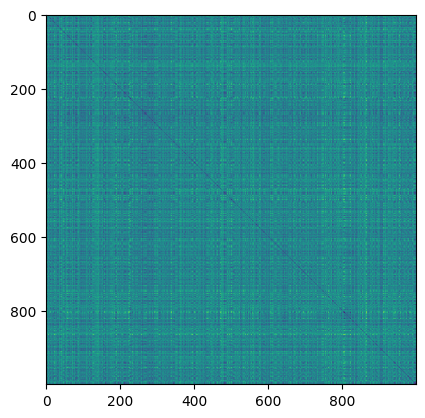

In [33]:
plt.imshow(domain_ab)

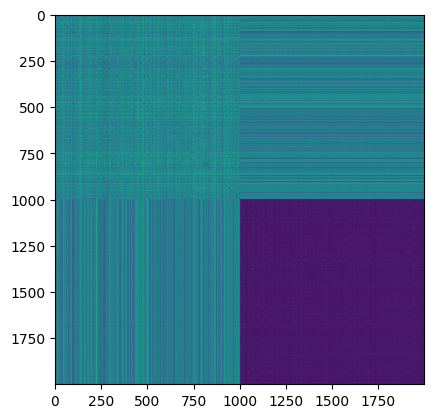

In [39]:
plt.imshow(block)

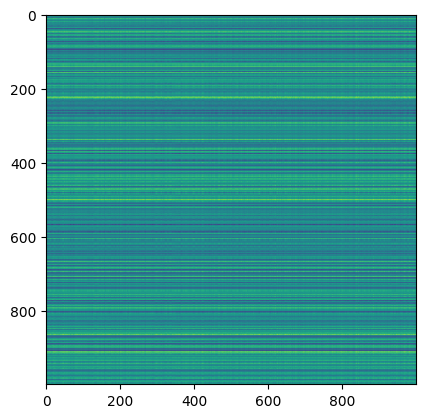

In [40]:
plt.imshow(block[:1000, 1000:])

(<matplotlib.image.AxesImage at 0x7f3b5831e650>, (1000, 3))

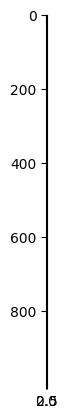

In [35]:
plt.imshow(jlma.Y1), jlma.Y1.shape

(<matplotlib.image.AxesImage at 0x7f3b583891e0>, (2000, 3))

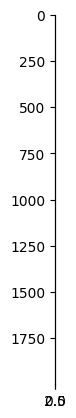

In [36]:
plt.imshow(jlma.Y), jlma.Y.shape